In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('titanic.csv')


In [126]:
dfs = df.drop(['PassengerId','Name','Ticket', 'SibSp','Parch','Cabin','Embarked'], axis='columns')
target=df['Survived']

In [127]:
dfs.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In the following lines I will analyse the Fare column to conclude if it is important to include in the final model. I think is not important, but my teacher has suggested it might be I will give it a try.

In [128]:
import matplotlib.pyplot as plt
import numpy as np

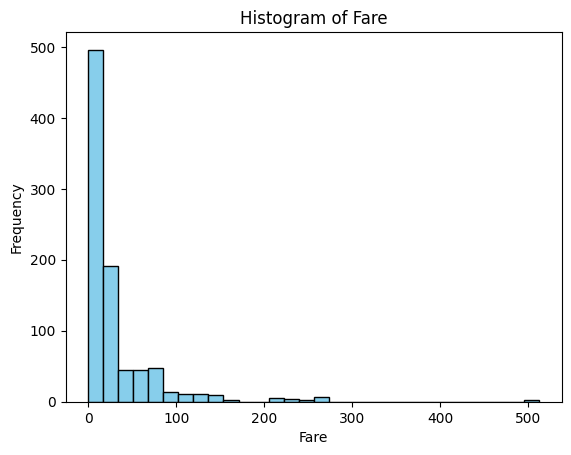

In [129]:
plt.hist(dfs['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [130]:
print('Total data point:',len(dfs.Fare))
print('mean:',dfs['Fare'].mean())
print('Stander diviation:', dfs['Fare'].std())
fare_mode = dfs['Fare'].mode()
mode_count = dfs['Fare'].value_counts().max()
print("Mode:", dfs['Fare'].mode())

Total data point: 891
mean: 32.204207968574636
Stander diviation: 49.6934285971809
Mode: 0    8.05
Name: Fare, dtype: float64


In [131]:
data = dfs.Fare
non_zero_data = data[data != 0]
lowest_non_zero_value = non_zero_data.min()
print("Lowest non-zero value:", lowest_non_zero_value)

Lowest non-zero value: 4.0125


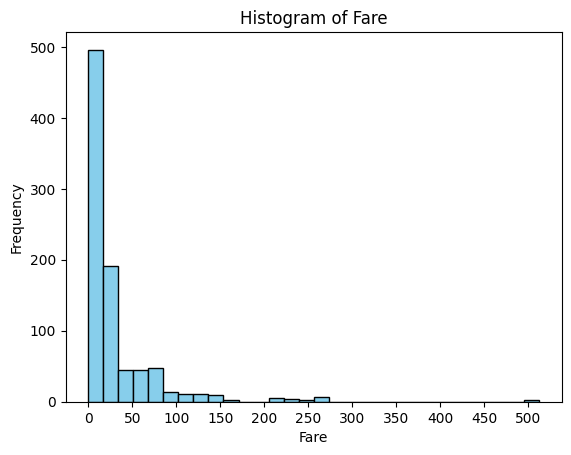

In [132]:
plt.hist(dfs['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 550, 50))
plt.show()


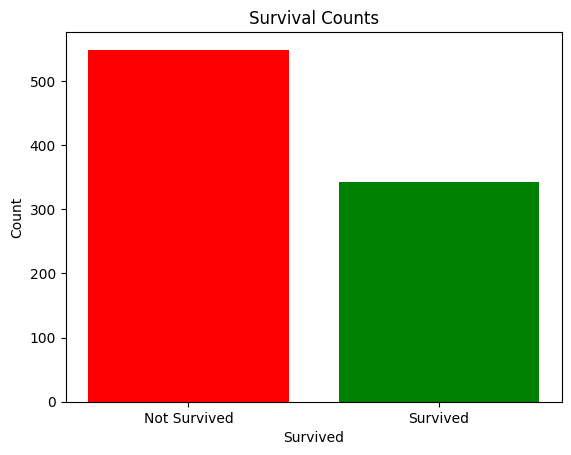

In [133]:
survived_counts = dfs['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [134]:
survived_counts = dfs['Survived'].value_counts()
print("Count of people that survived:", survived_counts[1])
print("Count of people that didn't survive:", survived_counts[0])

Count of people that survived: 342
Count of people that didn't survive: 549


In [135]:
within_std_left = []
within_std_right = []
within_2std_right = []
beyond_2std_right = []

mean_fare = dfs['Fare'].mean()
std_fare = dfs['Fare'].std()

for e in dfs['Fare']:
    if 0 <= e < mean_fare:
        within_std_left.append(e)
    elif mean_fare <= e <(mean_fare + std_fare):
        within_std_right.append(e)
    elif mean_fare <= e < (mean_fare + 2*std_fare):
        within_2std_right.append(e)
    elif e > (mean_fare + 2 * std_fare):
        beyond_2std_right.append(e)


In [136]:
print("Length of values within one standard deviation to the left of the mean:", len(within_std_left))
print("Length of values within one standard deviation to the right of the mean:", len(within_std_right))
print("Length of values within two standard deviations to the right of the mean:", len(within_2std_right))
print("Length of values beyond two standard deviations to the right of the mean:", len(beyond_2std_right))


Length of values within one standard deviation to the left of the mean: 680
Length of values within one standard deviation to the right of the mean: 138
Length of values within two standard deviations to the right of the mean: 35
Length of values beyond two standard deviations to the right of the mean: 38


In [137]:
not_survived_within_std_left = []
not_survived_within_std_right = []
not_survived_within_2std_right = []
not_survived_beyond_2std_right = []

for index in dfs.index:
    if dfs.loc[index, 'Survived'] == 0:
        fare = dfs.loc[index, 'Fare']
        if fare in within_std_left:
            not_survived_within_std_left.append(index)
        elif fare in within_std_right:
            not_survived_within_std_right.append(index)
        elif fare in within_2std_right:
            not_survived_within_2std_right.append(index)
        elif fare in beyond_2std_right:
            not_survived_beyond_2std_right.append(index)

print("Indices of people who didn't survive and belonged to within_std_left:", len(not_survived_within_std_left))
print("Indices of people who didn't survive and belonged to within_std_right:", len(not_survived_within_std_right))
print("Indices of people who didn't survive and belonged to within_2std_right:", len(not_survived_within_2std_right))
print("Indices of people who didn't survive and belonged to beyond_2std_right:", len(not_survived_beyond_2std_right))



Indices of people who didn't survive and belonged to within_std_left: 464
Indices of people who didn't survive and belonged to within_std_right: 68
Indices of people who didn't survive and belonged to within_2std_right: 7
Indices of people who didn't survive and belonged to beyond_2std_right: 10


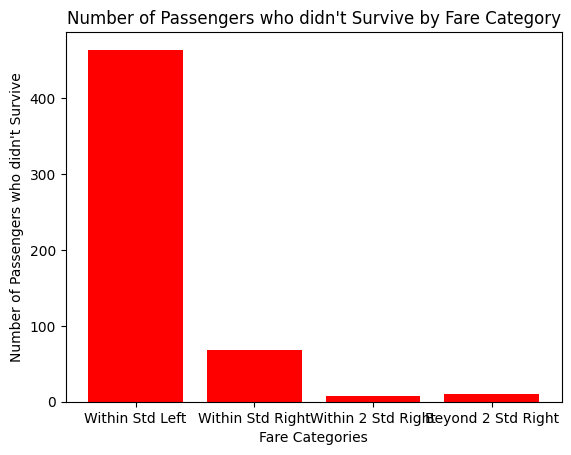

In [138]:
categories = ['Within Std Left', 'Within Std Right', 'Within 2 Std Right', 'Beyond 2 Std Right']

counts = [
    len(not_survived_within_std_left),
    len(not_survived_within_std_right),
    len(not_survived_within_2std_right),
    len(not_survived_beyond_2std_right)
]

plt.bar(categories, counts, color='red')


plt.xlabel('Fare Categories')
plt.ylabel('Number of Passengers who didn\'t Survive')
plt.title('Number of Passengers who didn\'t Survive by Fare Category')

plt.show()

After having cunducted this analyisis, it seems clear that the price of the ticket, was a strong factor of passanger survival.

# Model construction

In [164]:
dfs.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [165]:
dummies = pd.get_dummies(dfs.Sex)

In [166]:
for i in dummies.index: 
    if dummies.loc[i, 'male']== False:
        dummies.loc[i, 'male'] =  0
    else:
        dummies.loc[i, 'male'] =  1
    if dummies.loc[i, 'female']== False:
        dummies.loc[i, 'female'] =  0
    else:
        dummies.loc[i, 'female'] =  1

In [167]:
dummies.drop('male', axis='columns')

,female
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [168]:
dummies.rename(columns={'female': 'gender'}, inplace=True)

In [173]:
merged = pd.concat([dfs,dummies], axis= 'columns')
final_df = merged.drop(['Sex','male'], axis='columns')
final_df.head()

,Survived,Pclass,Age,Fare,gender
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [176]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [177]:
model = tree.DecisionTreeClassifier()

In [181]:
X = final_df
y = target

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

In [201]:
model.fit(final_df,target)

DecisionTreeClassifier()

In [202]:
model.score(X_test,y_test )

1.0